### Andhika Rahadian
### 13218030
### Run All untuk Menjalankan Seluruh Proses Training MultiLayer Perceptron untuk XOR Gate

In [17]:
import numpy as np
import matplotlib.pyplot as plt
class MultilayerPerceptron:
    def __init__(self, inp, target,n_inp, n_hidden, n_out, alpha, epoch):
        self.trainData = inp
        self.testData = inp
        self.target = target.T
        self.alpha = alpha
        self.epoch = epoch

        # Init weights dengan random value
        self.W1 = np.random.uniform(size=(n_inp, n_hidden))
        self.W2 = np.random.uniform(size=(n_hidden, n_out))

        # Init bias dengan random value
        self.B1 = np.random.uniform(size=(1,n_hidden))
        self.B2 = np.random.uniform(size=(1,n_out))

        print("Initial Weights and Biases:  (using random uniform)")
        print("W1: \n{} \nW2: \n{} \nB1: {} \nB2: {}".format(self.W1,self.W2,self.B1,self.B2))


    def actifunction(self,z,mode):
        if (mode == "linear"):
            return z
        if (mode == "sigmoid"):
            return 1/(1 + np.exp(-z))
        if (mode == "hardlim"):
            if z > 0:
                return 1
            else:
                return 0
        if (mode == "relu"):
            if z > 0:
                return z
            else:
                return 0
    
    def derivativeActifunction(self,a,mode):
        if (mode == "linear"):
            return 1
        if (mode == "sigmoid"):
            return a*(1-a)
        if (mode == "relu"):
            if a > 0:
                return 1
            else:
                return 0


    def forwardpath(self):
        # z1, a1 : z hidden layer 1, W1 Weights layer 0 ke 1, B1 biases layer 0 ke 1
        self.z1 = np.dot(self.trainData, self.W1) + self.B1
        self.a1 = self.actifunction(self.z1,mode="sigmoid")

        # z2, a2 : z output layer (layer 2) W2 Weights layer 1 ke 2, B1 biases layer 1 ke 2
        self.z2 = np.dot(self.a1, self.W2) + self.B2
        self.a2 = self.actifunction(self.z2,mode="sigmoid")
      
        return self.a2
    
    #learning rule
    def backpropagation(self):
        e = (self.target - self.a2)
        # delta cost function F terhadap W1 dFdW1
        # dFdW1 = error * da2/dz2 * dz2/da1 * da1/dz1 * (dz1/dW1)T
        dFdW1 = np.matmul(self.trainData.T , (((e * self.derivativeActifunction(self.a2,mode="sigmoid")) * self.W2.T) * self.derivativeActifunction(self.a1,mode="sigmoid")))

        # delta cost function F terhadap W2 dFdW2
        # dFdW2 = error * da2/dz2 * (dz2/dW2)T
        dFdW2 = np.matmul(self.a1.T , (e * self.derivativeActifunction(self.a2,mode="sigmoid")))

        # Weight update
        self.W1 = self.W1 + self.alpha * dFdW1
        self.W2 = self.W2 + self.alpha * dFdW2

        # Bias update
        self.B1 = self.B1 +  np.sum(self.alpha * ((e * self.derivativeActifunction(self.a2,mode="sigmoid")) * self.W2.T) * self.derivativeActifunction(self.a1,mode="sigmoid"), axis=0)
        self.B2 = self.B2 + np.sum(self.alpha * e * self.derivativeActifunction(self.a2,mode="sigmoid"), axis=0)

    def training(self):
        Losses = []
        for x in range(self.epoch):
            self.forwardpath()
            loss = 0.5 * (self.target - self.a2) ** 2
            Losses.append(np.sum(loss)/4)
            self.backpropagation()
        return Losses
    
    def evaluate(self):
        #loss = mean squared error
        test_result = self.forwardpath()
        print("\nWeight and Bias after Training: ")
        print("W1: \n{} \nW2: \n{} \nB1: {} \nB2: {}".format(self.W1,self.W2,self.B1,self.B2))

        print("\nTest Results: ")
        print("Input Data (x1,x2) : {} | Actual Output (y): {} | Predicted Output (y'): {}".format(self.trainData[0],self.target[0],test_result[0]))
        print("Input Data (x1,x2) : {} | Actual Output (y): {} | Predicted Output (y'): {}".format(self.trainData[1],self.target[1],test_result[1]))
        print("Input Data (x1,x2) : {} | Actual Output (y): {} | Predicted Output (y'): {}".format(self.trainData[2],self.target[2],test_result[2]))
        print("Input Data (x1,x2) : {} | Actual Output (y): {} | Predicted Output (y'): {}".format(self.trainData[3],self.target[3],test_result[3]))



trainData = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]])

targetXOR = np.array([[0,1,1,0]])

# Instantiasi Objek Multilayer Perceptrion
model = MultilayerPerceptron(trainData,targetXOR,n_inp=2,n_hidden=2,n_out=1,alpha=0.15,epoch=6000)

# Array Losses yang didapatkan dari iterasi training
Losses = model.training()

# Testing dan Evaluasi
model.evaluate()


Initial Weights and Biases:  (using random uniform)
W1: 
[[0.73879097 0.52976883]
 [0.43101837 0.67295347]] 
W2: 
[[0.72646627]
 [0.41994305]] 
B1: [[0.74378476 0.65592924]] 
B2: [[0.89042762]]

Weight and Bias after Training: 
W1: 
[[5.68670497 3.49749701]
 [5.72125766 3.50384728]] 
W2: 
[[ 7.12913283]
 [-7.73273275]] 
B1: [[-2.32324183 -5.34733202]] 
B2: [[-3.18947403]]

Test Results: 
Input Data (x1,x2) : [0 0] | Actual Output (y): [0] | Predicted Output (y'): [0.06977965]
Input Data (x1,x2) : [0 1] | Actual Output (y): [1] | Predicted Output (y'): [0.9341575]
Input Data (x1,x2) : [1 0] | Actual Output (y): [1] | Predicted Output (y'): [0.93403074]
Input Data (x1,x2) : [1 1] | Actual Output (y): [0] | Predicted Output (y'): [0.07227499]


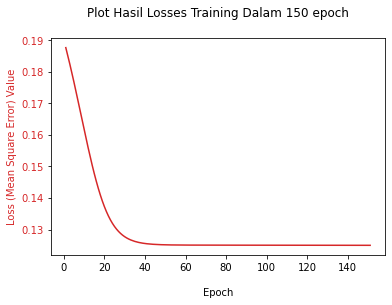

In [19]:
n = [i for i in range(1,501)]
figure, axis = plt.subplots()
plt.title('Plot Hasil Losses Training Dalam 150 epoch\n')
color = 'tab:red'
axis.set_xlabel('\nEpoch')
axis.set_ylabel('Loss (Mean Square Error) Value', color=color)
axis.plot(n[0:151], Losses[0:151], color=color)
axis.tick_params(axis='y', labelcolor=color)